# MNIST For ML Beginners

公式の[MNIST For ML Beginners](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html) より

In [1]:
# データのロード
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# 予測式の定義
import tensorflow as tf

x = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [3]:
# ロス関数の定義
y_ = tf.placeholder(tf.float32, [None, 10]) # train
loss = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [4]:
# スコア式の定義
correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

In [5]:
# 実験
init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if not i % 200:
        print(session.run(
            accuracy,
            feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.4075
0.8989
0.904
0.9028
0.918


[7]


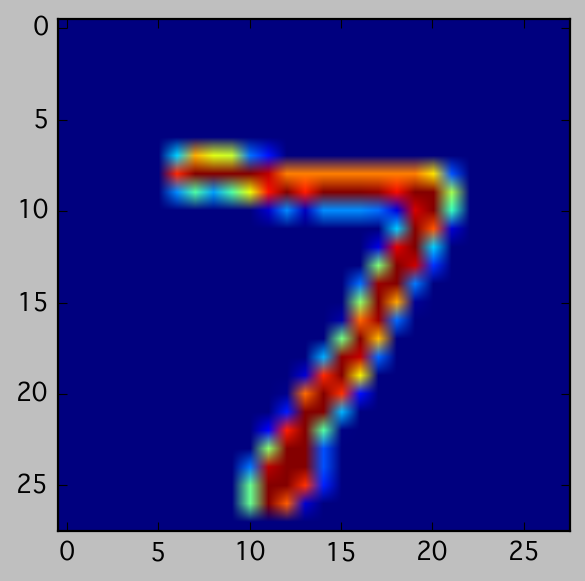

In [6]:
%matplotlib inline
from matplotlib.pyplot import imshow
imshow(mnist.test.images[0].reshape([28, 28]))
print(session.run(tf.argmax(y, 1), feed_dict={x: [mnist.test.images[0]]}))

学習できているっぽい

## Softmax関数を自分で定義

In [7]:
def softmax(x):
    e = tf.exp(x)
    dnm = tf.div(1.0, tf.reduce_sum(e, 1))
    return e * tf.tile(tf.expand_dims(dnm, 1), [1, 10])

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10]) # train
loss = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if not i % 200:
        print(session.run(
            accuracy,
            feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.406
0.9005
0.9104
0.9099
0.9138


[7]


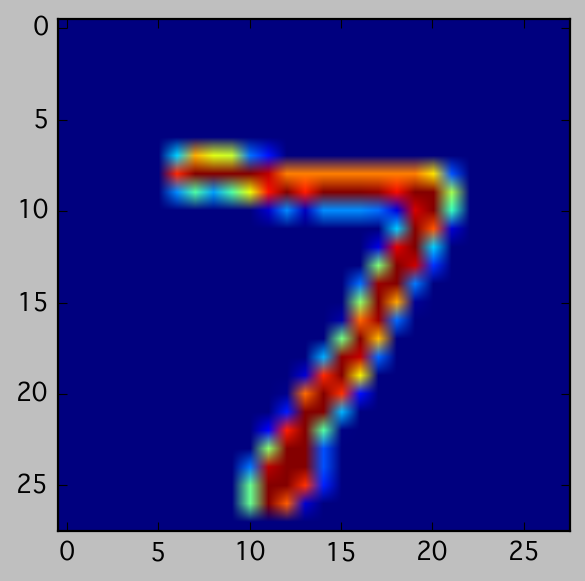

In [8]:
imshow(mnist.test.images[0].reshape([28, 28]))
print(session.run(tf.argmax(y, 1), feed_dict={x: [mnist.test.images[0]]}))

同様に学習できているっぽい

## 速度の比較

ネイティブのsoftmaxの場合と、独自定義のsoftmaxの場合で、速度が違うかを確認する

In [9]:
def examine(softmax_func):
    y = softmax_func(tf.matmul(x, W) + b)
    y_ = tf.placeholder(tf.float32, [None, 10]) # train
    loss = -tf.reduce_sum(y_ * tf.log(y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

    init = tf.initialize_all_variables()
    session = tf.Session()
    session.run(init)

    for i in range(2000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [10]:
%timeit examine(tf.nn.softmax)

1 loops, best of 3: 5.72 s per loop


In [11]:
%timeit examine(softmax)

1 loops, best of 3: 5.89 s per loop


自分で定義したsoftmaxの方が遅い

## 何枚か実験してみる

予測: 7	正解: 7
予測: 2	正解: 2
予測: 1	正解: 1
予測: 0	正解: 0
予測: 4	正解: 4
予測: 1	正解: 1
予測: 4	正解: 4
予測: 9	正解: 9
予測: 6	正解: 5
予測: 9	正解: 9
予測: 0	正解: 0
予測: 6	正解: 6
予測: 9	正解: 9
予測: 0	正解: 0
予測: 1	正解: 1
予測: 5	正解: 5
予測: 9	正解: 9
予測: 7	正解: 7
予測: 3	正解: 3
予測: 4	正解: 4
予測: 9	正解: 9
予測: 6	正解: 6
予測: 6	正解: 6
予測: 5	正解: 5
予測: 4	正解: 4
予測: 0	正解: 0
予測: 7	正解: 7
予測: 4	正解: 4
予測: 0	正解: 0
予測: 1	正解: 1
予測: 3	正解: 3
予測: 1	正解: 1
予測: 3	正解: 3
予測: 0	正解: 4
予測: 7	正解: 7
予測: 2	正解: 2
予測: 7	正解: 7
予測: 1	正解: 1
予測: 2	正解: 2
予測: 1	正解: 1
予測: 1	正解: 1
予測: 7	正解: 7
予測: 4	正解: 4
予測: 2	正解: 2
予測: 3	正解: 3
予測: 5	正解: 5
予測: 1	正解: 1
予測: 2	正解: 2
予測: 4	正解: 4
予測: 4	正解: 4
予測: 6	正解: 6
予測: 3	正解: 3
予測: 5	正解: 5
予測: 5	正解: 5
予測: 6	正解: 6
予測: 0	正解: 0
予測: 4	正解: 4
予測: 1	正解: 1
予測: 9	正解: 9
予測: 5	正解: 5
予測: 7	正解: 7
予測: 8	正解: 8
予測: 9	正解: 9
予測: 2	正解: 3
予測: 7	正解: 7
予測: 4	正解: 4
予測: 7	正解: 6
予測: 4	正解: 4
予測: 3	正解: 3
予測: 0	正解: 0
予測: 7	正解: 7
予測: 0	正解: 0
予測: 2	正解: 2
予測: 9	正解: 9
予測: 1	正解: 1
予測: 7	正解: 7
予測: 3	正解: 3
予測: 2	正解: 2
予測: 9	正解: 9
予測: 7	正解: 7
予測: 7	正解: 7
予測: 6	正解: 6
予測: 2	正解: 2
予測: 

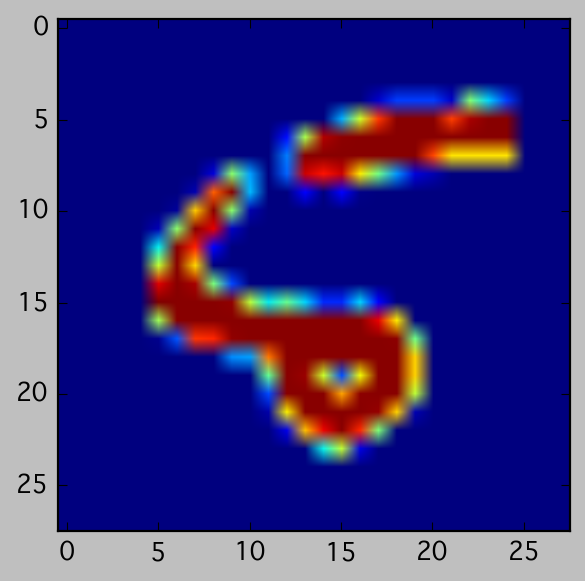

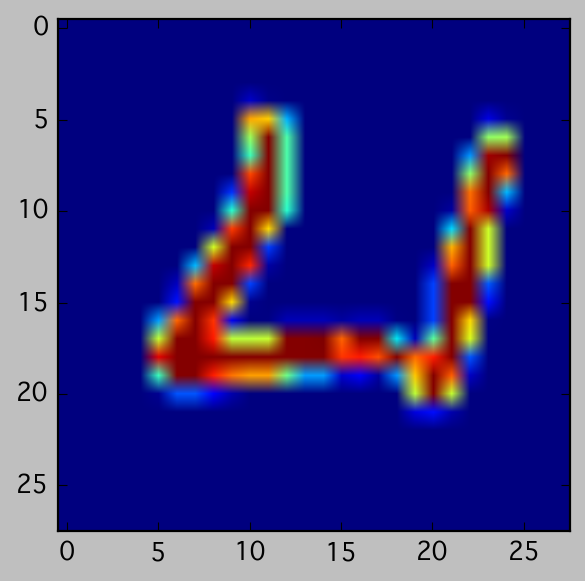

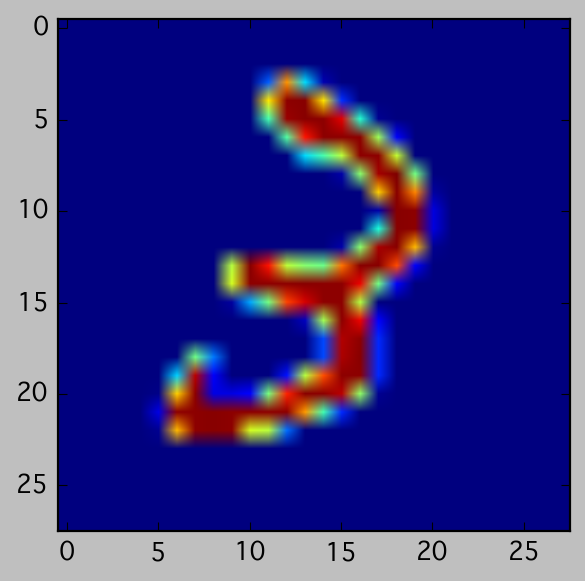

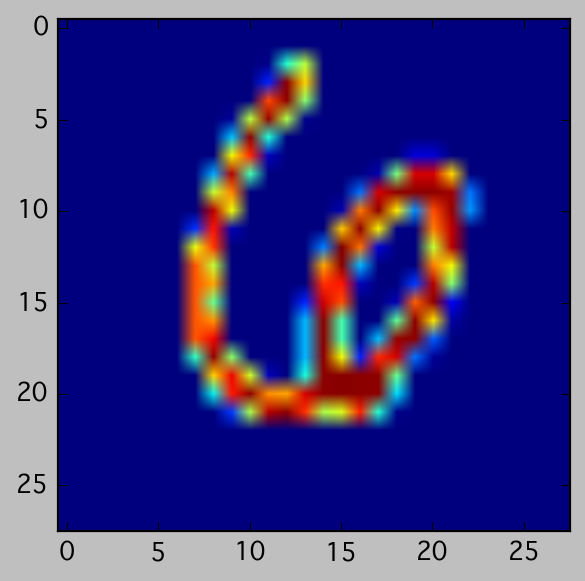

In [29]:
%matplotlib inline
from matplotlib.pyplot import figure
import numpy as np
from IPython.display import Image
from IPython.display import display
prediction = session.run(tf.argmax(y, 1), feed_dict={x: mnist.test.images})

miss = []

for i in range(100):
    truth = np.argmax(mnist.test.labels[i])
    print(u'予測: {}\t正解: {}'.format(prediction[i], truth))
    if truth != prediction[i]:
        miss.append(i)

print(u"誤った事例;")
for m in miss:
    figure()
    imshow(mnist.test.images[m].reshape([28, 28]))